# Exercise 6.4 Supervised Machine Learning: Regression

# Linear Regression Analysis:
## The variable "Number of Mentions" will be used as the predictor for "COVID-19 Deaths".
### Each row represents a specific condition for a given age group, state, and time period.
### The "Number of Mentions" variable indicates how many times that specific condition was mentioned on death certificates.
### The "COVID-19 Deaths" variable represents the number of COVID-19 related deaths for that combination of condition, age group, state, and time period.
### Based on the previous analysis in exercise 6.2, these two variables are closely related.
### The linear regression analysis will be used to further explore the relationship between these two variables.

# Contents:

    0. Import Libraries
    1. Loading and Checking the Data
    2. Clean the Data
    3. Exploratory Data Analysis
    4. State Hypothesis
    5. Reshape Variables into NumPy Arrays
    6. Split the Data into Training and Test Sets
    7. Run a Linear Regression on the Data
    8. Visualize the Results
    9. Interpretation of the Results
    10. Check Model Performance Statistics
    11. Compare the Predicted y Values with the Actual y Values in a Dataframe
    12. Interpretation

# 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Loading and Checking the Data

In [2]:
# Define the path to the data files
path = r'/Users/sijju/Downloads/Data analysis/Data Immersion/Acheivement 6/Project'

In [3]:
# Load the dataset on COVID-19 deaths and contributing conditions as "df_cov_19"
df_cov_19 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 
                                    'Cleaned_Conditions_Contributing_to_COVID-19_Deaths_by_State_and_Age_Provisional_2020-2023.csv'))

In [4]:
# Checking the dataset is correctly loaded
print(df_cov_19.head())
print(df_cov_19.info())
df_cov_19.shape

   Data As Of  Start Date    End Date    Year  Month    State  \
0  2023-09-24  2020-01-01  2020-01-31  2020.0    1.0  Alabama   
1  2023-09-24  2020-02-01  2020-02-29  2020.0    2.0  Alabama   
2  2023-09-24  2020-03-01  2020-03-31  2020.0    3.0  Alabama   
3  2023-09-24  2020-04-01  2020-04-30  2020.0    4.0  Alabama   
4  2023-09-24  2020-05-01  2020-05-31  2020.0    5.0  Alabama   

        Condition Group                Condition ICD10_codes Age Group  \
0  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
1  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
2  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
3  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
4  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   

   COVID-19 Deaths  Number of Mentions Flag  
0              0.0                 0.0  NaN  
1              0.0                 0.0  NaN  
2              0.0        

(430560, 13)

# 2. Clean the Data

In [5]:
# Select only the numeric columns necessary for analysis
df_cov_19_numeric = df_cov_19[['Number of Mentions', 'COVID-19 Deaths']]

In [6]:
# Verify results of the changes
print(df_cov_19_numeric.head())
print(df_cov_19_numeric.info())
df_cov_19_numeric.shape

   Number of Mentions  COVID-19 Deaths
0                 0.0              0.0
1                 0.0              0.0
2                 0.0              0.0
3                 0.0              0.0
4                 0.0              0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430560 entries, 0 to 430559
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Number of Mentions  430560 non-null  float64
 1   COVID-19 Deaths     430560 non-null  float64
dtypes: float64(2)
memory usage: 6.6 MB
None


(430560, 2)

# 3. Exploratory Data Analysis

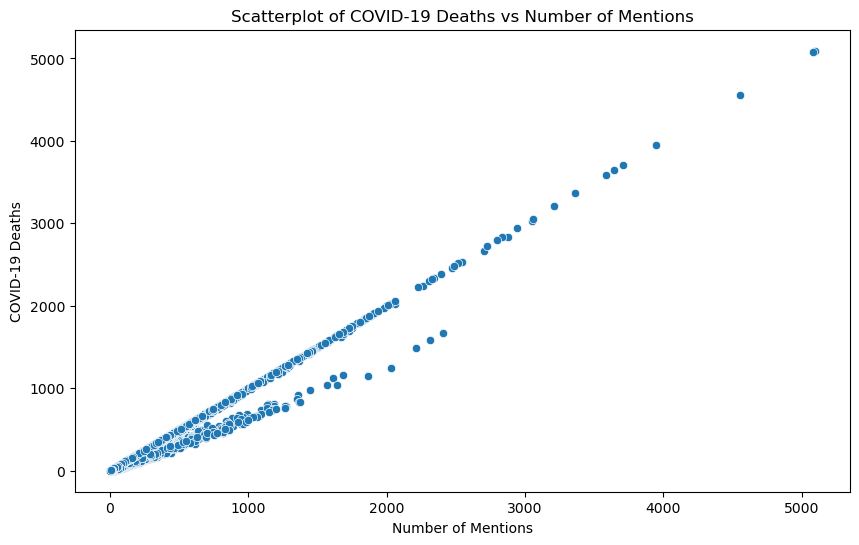

In [7]:
# Scatterplot to visualize the relationship between Number of Mentions and COVID-19 Deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cov_19_numeric, x='Number of Mentions', y='COVID-19 Deaths')
plt.title('Scatterplot of COVID-19 Deaths vs Number of Mentions')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
plt.show()

# 4. State Hypothesis

## Hypothesis: If the number of mentions of a condition on death certificates is higher, then the COVID-19 death count will be significantly higher.

# 5. Reshape Variables into NumPy Arrays

### X = the independent variable
### Y = the dependent variable.
### "Number of Mentions" is the predictor (independent variable) and "COVID-19 Deaths" is the response (dependent variable)

In [8]:
# Define the independent variable (x) and the dependent variable (y)
X = df_cov_19_numeric['Number of Mentions'].values.reshape(-1, 1)
y = df_cov_19_numeric['COVID-19 Deaths'].values

# 6. Split the Data into Training and Test Sets

In [9]:
 # 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

In [10]:
# Verify the shape of the training and test sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (301392, 1)
X_test shape: (129168, 1)
y_train shape: (301392,)
y_test shape: (129168,)


# 7. Linear Regression

### Running a linear regression on the data by first fitting the model to the training set and then creating a prediction for y on the test set.

In [11]:
# Initialize the linear regression model
regression = LinearRegression()

In [12]:
# Fit the model to the training data
regression.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predict on the test data
y_pred = regression.predict(X_test)

# 8. Visualize the Results

### Create a plot that shows the regression line on the test set.

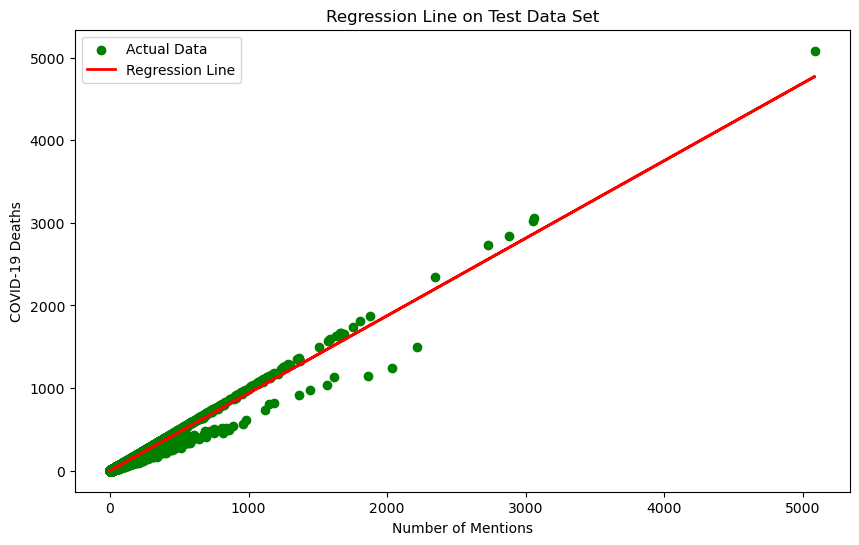

In [24]:
# Plot actual vs predicted values to visualize model performance
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='green', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Regression Line on Test Data Set')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
regression_line_test_set = plt.gcf()
plt.legend()
plt.show()



In [25]:
# Export to the "Visualizations" folder
regression_line_test_set.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regression_line_test_set.png'))

# 9. Interpretation of the Results

### The scatterplot and regression line visualization show a clear positive relationship between the "Number of Mentions" of a condition on death certificates and "COVID-19 Deaths". 
### The regression line closely follows the data points, indicating a strong fit.

# 10. Check Model Performance Statistics

In [21]:
# Calculate the mean squared error (MSE) and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 66.74246284301805
R2 Score: 0.9752014744793419


# 11. Compare the Predicted y Values with the Actual y Values in a Dataframe

In [22]:
 # Create a dataframe to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [23]:
# Verify the results
print(comparison_df.head(30))
print(comparison_df.info())
comparison_df.shape

    Actual   Predicted
0      0.0   -0.126764
1     55.0   53.358783
2      0.0   -0.126764
3      0.0   -0.126764
4      0.0   -0.126764
5      0.0   -0.126764
6      0.0   -0.126764
7      0.0   -0.126764
8      0.0   -0.126764
9      0.0   -0.126764
10    20.0   34.591924
11    39.0   72.125642
12     2.0    7.379979
13     3.0    8.318322
14     0.0   -0.126764
15   330.0  309.526406
16     0.0   -0.126764
17     0.0   -0.126764
18     5.0    6.441636
19     6.0    6.441636
20     3.0    2.688264
21     8.0    0.811579
22     0.0   -0.126764
23     9.0    0.811579
24     0.0   -0.126764
25     2.0    6.441636
26     0.0   -0.126764
27     4.0    1.749921
28     0.0   -0.126764
29     1.0    4.564950
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129168 entries, 0 to 129167
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Actual     129168 non-null  float64
 1   Predicted  129168 non-null  float64
dtypes: float

(129168, 2)

# 12. Interpretation

### The relatively low MSE of 66.75 suggests that the model's predictions are close to the actual values. 
### A high R-squared score of 0.975 indicates that approximately 97.5% of the variance in "COVID-19 Deaths" can be explained by the "Number of Mentions" of conditions. 
### Overall, the statistics indicate that this linear regression model is effective in predicting "COVID-19 deaths" based on the "Number of Mentions".

# END